In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Only need columns of dataset is loaded

In [3]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8,
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 ,
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str,
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16,
         'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16,
         'SecurityDelay':np.float16, 'LateAircraftDelay': np.float16,
         'DepTime': np.float16}

In [4]:
%%time
# Specifying path
path = "C:/Users/MIC/OneDrive - UGent/Desktop/Data Engineering/Altschool/Ope_classes/Python Class -20230308T154637Z-001/Python Class/Python Capstone 1/Project 2 (Assignment)/2008.csv"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 3.28 s


In [13]:
# Checking no. of rows and columns and printing column names
print(flights_df.shape)
print(flights_df.columns)

(2389217, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [5]:
flights_df.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,WN,51,0.0,4.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,WN,940,3.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,WN,2621,5.0,2.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,WN,389,-5.0,-1.0,HOU,MDW,937,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,WN,519,26.0,28.0,HOU,MDW,937,0,NaN,11.0,0.0,0.0,0.0,15.0


In [16]:
# Transposing the frame to see all features at once
flights_df.head().transpose()

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25
ArrDelay,16.0,2.0,-4.0,-2.0,16.0
DepDelay,18.0,5.0,-6.0,8.0,23.0
Origin,HOU,HOU,HOU,HOU,HOU


In [17]:
# Examining Data types of all features and total dataframe size in memory
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [18]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     97.302798
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

In [19]:
# Basic Stats for Each feature
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2389217.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2389217.0,2.505009,1.121493,1.0,1.0,3.0,4.0,4.0
DayofMonth,2389217.0,15.663856,8.750405,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2389217.0,3.909625,1.980431,1.0,2.0,4.0,6.0,7.0
DepTime,2324775.0,NaN,NaN,1.0,930.0,1330.0,1733.0,2400.0
FlightNum,2389217.0,2213.887980,1951.392101,1.0,605.0,1544.0,3631.0,9741.0
ArrDelay,2319121.0,NaN,NaN,-91.0,-9.0,0.0,15.0,2460.0
DepDelay,2324775.0,NaN,NaN,-92.0,-4.0,0.0,11.0,2468.0
Distance,2389217.0,726.158911,557.176261,17.0,325.0,583.0,957.0,4962.0
Cancelled,2389217.0,0.026972,0.162002,0.0,0.0,0.0,0.0,1.0


In [20]:
# count unique carriers and plot their relative share of flights
flights_df.nunique()['UniqueCarrier']

20

In [21]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    398966
AA    204519
OO    195184
MQ    167860
UA    154036
US    153539
DL    151409
XE    138757
NW    122799
CO    102702
EV     92383
9E     88359
FL     86856
YV     85686
OH     71934
B6     67478
AS     49885
F9     30680
HA     18385
AQ      7800
dtype: int64

<AxesSubplot:xlabel='UniqueCarrier'>

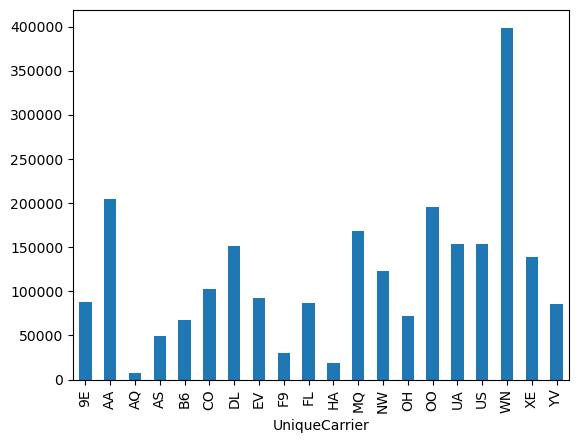

In [22]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar')

#### Grouping by categories can enable us to calculate different aggregated stats. E.g finding top-3 flight codes, that have the largest total distance travelled in year 2008.

In [23]:
flights_df.groupby(['UniqueCarrier', 'FlightNum'])\
    .agg({'Distance': [np.mean, np.sum, 'count'], 'Cancelled': np.sum})\
    .sort_values(('Distance', 'sum'), ascending=False)\
    .iloc[0:3]

Distance                 Cancelled
                            mean       sum count       sum
UniqueCarrier FlightNum                                   
UA            3           2827.0  729366.0   258         4
CO            15          4962.0  600402.0   121         0
              14          4962.0  600402.0   121         0

In [25]:
# Another method
flights_df.groupby(['UniqueCarrier', 'FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
UA             3            729366.0
CO             15           600402.0
               14           600402.0
Name: Distance, dtype: float64

In [30]:
# Number of flights by days of week and months:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225


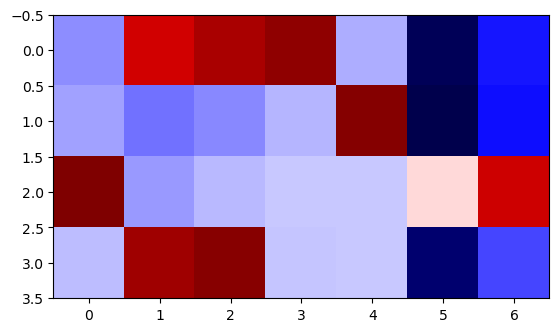

In [32]:
# coloring tables in order to easily notice outliers:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
          cmap = 'seismic', interpolation='None');

AttributeError: 'Rectangle' object has no property 'bin'

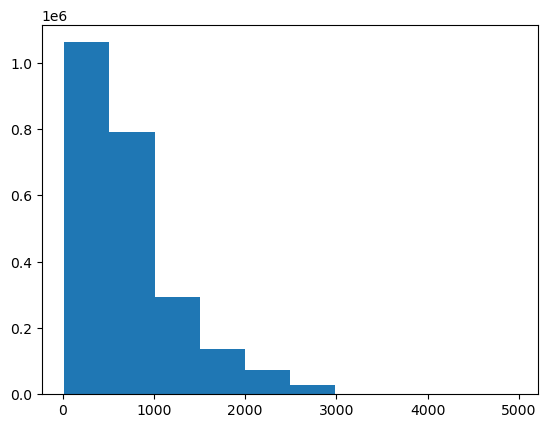

In [142]:
flights_df.hist('Distance', bin=20)

In [36]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [37]:
num_flights_by_date = flights_df.groupby('Date').size()

<AxesSubplot:xlabel='Date'>

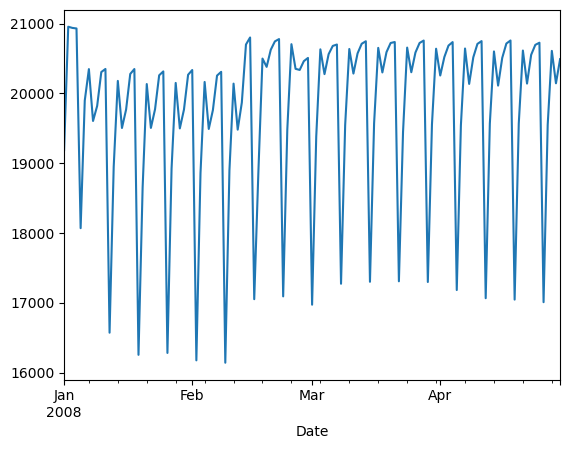

In [38]:
num_flights_by_date.plot()

<AxesSubplot:xlabel='Date'>

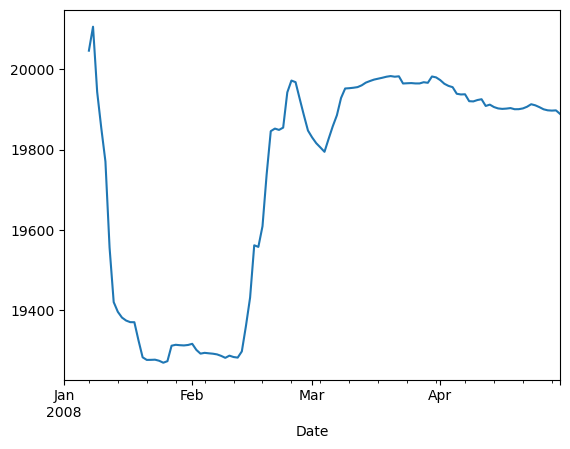

In [39]:
num_flights_by_date.rolling(window=7).mean().plot()

In [42]:
# 1. How many unique carriers are there in our dataset?
flights_df.nunique()['UniqueCarrier']

20

In [114]:
# 2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference?

# count the number of completed and cancelled flights
completed_flights = len(flights_df[flights_df['Cancelled']==0])
cancelled_flights = len(flights_df[flights_df['Cancelled']==1])

#finding the difference
difference = completed_flights - cancelled_flights
difference


2324775

In [213]:
# 3. Find a flight with the longest departure delays and a flight with the longest arrival delay. 
# Do they have the same destination airport, and if yes, what is its code?
flights_df.groupby(['Dest'])\
    .agg({'DepDelay': np.max, 'ArrDelay': np.max})\
    .sort_values(('DepDelay'), ascending=False)\
    .iloc[0:1]

,DepDelay,ArrDelay
Dest,,
MSP,2468.0,2460.0


In [184]:
# 4. Find the carrier that has the greatest number of cancelled flights.
(flights_df[flights_df.Cancelled==1])['UniqueCarrier'].value_counts()

AA    10784
MQ     8960
OO     6773
YV     5150
UA     4616
WN     4380
9E     4097
XE     3925
DL     3051
OH     2618
US     2390
EV     2346
NW     1407
CO     1084
FL      903
B6      902
AS      804
HA      112
F9       98
AQ       42
Name: UniqueCarrier, dtype: int64

In [5]:
# ignore: ruined the dataframe at first, so recreating it
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8,
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 ,
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str,
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16,
         'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16,
         'SecurityDelay':np.float16, 'LateAircraftDelay': np.float16,
         'DepTime': np.float16}

In [271]:
%%time
# Specifying path
path = "C:/Users/MIC/OneDrive - UGent/Desktop/Data Engineering/Altschool/Ope_classes/Python Class -20230308T154637Z-001/Python Class/Python Capstone 1/Project 2 (Assignment)/2008.csv"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 3.31 s


In [292]:
flights_df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


In [6]:
flights_df['DepTime'].describe()

count    2324775.0
mean           NaN
std            NaN
min            1.0
25%          930.0
50%         1330.0
75%         1733.0
max         2400.0
Name: DepTime, dtype: float64

In [7]:
flights_df['DepTime'].replace(2400, 0, inplace=True)

In [8]:
flights_df[flights_df['DepTime']==0]['DepTime']

102463     0.0
102486     0.0
131044     0.0
132521     0.0
136862     0.0
          ... 
2328252    0.0
2334357    0.0
2336093    0.0
2341328    0.0
2374262    0.0
Name: DepTime, Length: 209, dtype: float16

In [9]:
#trying to remove '.' from the "DepTime" values so i can convert them to String and the datetime format
flights_df['DepTime'].fillna(0, inplace= True)
flights_df['DepTime']=flights_df['DepTime'].astype(int)
flights_df['DepTime']=flights_df['DepTime'].astype(str)

In [11]:
# coverting to datetime format
from datetime import datetime, date, time, timedelta
flights_df['DepTime']=flights_df['DepTime'].map(lambda x: datetime.strptime(x.zfill(4), "%H%M%S").time())

In [13]:
flights_df['DepTime'] = pd.to_datetime(flights_df['DepTime'], format='%H:%M:%S').dt.hour
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,13,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,11,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,20,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,9,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,14,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'COunt')

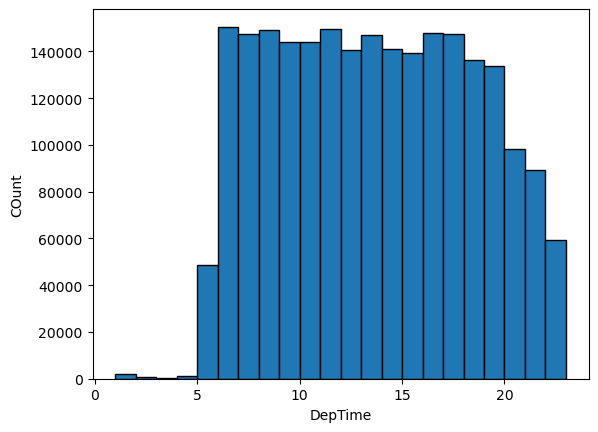

In [15]:
# no.5 Histogram of Hours
flights_df['hour'] = flights_df['DepTime']
plt.hist(flights_df['DepTime'], edgecolor='black', bins=(np.arange(1,24,1)))
plt.xlabel('DepTime')

plt.ylabel('COunt')

In [327]:
# Verifying that graph above is indeed correct
flights_df.groupby(flights_df['DepTime']).size().sort_values(ascending=False)

DepTime
6     150593
11    149688
8     149022
16    147702
7     147575
17    147496
13    146839
10    144128
9     143866
14    140860
12    140542
15    139343
18    136556
19    133961
20     98407
21     89153
0      71684
5      48577
22     42051
23     17200
1       2047
4       1099
2        595
3        233
dtype: int64

In [7]:
# 6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?
# my code looks correct but doen't work so i intuited the answer from plot in 5 above

# total_flights= flights_df.groupby('DepTime').size()

# number of cancelled flights for each hour
# cancelled_flights = flights_df[flights_df['Cancelled']==1].groupby('DepTime').size()
# hour_least_cancelled = cancelled_flights.idxmin()

In [31]:
# 7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.
flights_df = flights_df[flights_df['Cancelled']==0]
hourly_flights = flights_df.groupby('DepTime').size()
no_cancelled_flights = hourly_flights[hourly_flights ==hourly_flights.min()].index.tolist()
no_cancelled_flights

[3]

In [34]:
# 8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.
departures_by_hour = flights_df.groupby('DepTime').size()
busiest_hour = departures_by_hour.idxmax()
busiest_hour

6

In [36]:
# 9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. 
# Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?
# Hint: Consider only completed flights.

# filtering out cancelled flights
flights_df=flights_df[flights_df['Cancelled']==0]
# Grouping data "DepDelay" and find the mean
avg_delay= flights_df.groupby('DepTime')['DepDelay'].mean()

# Checking if any negative average departure delays exist:
if (avg_delay <0).any():
    early_departure= avg_delay[avg_delay<0].index.tolist()
    
    print(early_departure)
else:
    print('Planes did not depart earlier than expected')


[5, 6]


In [43]:
# 10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. 
# At what time does the greatest number of its planes depart?

# Filtering the data by carrier name MSP
msp_flights = flights_df.loc[(flights_df['UniqueCarrier']=='MSP') & (flights_df['Cancelled']==0)]

# passing the time into msp_flights
hourly_departure=msp_flights['DepTime'].apply(lambda x: str(int(x).zfill(4)[:2]).value_counts())
# grouping by DepTime and counting
msp_departure_max = hourly_departure.idxmax()
msp_departure_max




ValueError: attempt to get argmax of an empty sequence

In [47]:
# 11. Find top-10 carriers in terms of the number of completed flights
#(UniqueCarrier column)?

#Which of the listed below is not in your top-10 list?
# filtering to retain completed flights
completed_flights = flights_df[flights_df['Cancelled']==0]
#using value-counts to count completed flights for each carrier
carrier_counts= completed_flights['UniqueCarrier'].value_counts()

# getting the top 10 carriers
top_10_carriers = carrier_counts.head(10)
top_10_carriers

WN    394586
AA    193735
OO    188411
MQ    158900
US    151149
UA    149420
DL    148358
XE    134832
NW    121392
CO    101618
Name: UniqueCarrier, dtype: int64

 #### 11. ANS EV

In [58]:
# 12. Plot distributions of flight cancellation reasons (CancellationCode).
#What is the most frequent reason for flight cancellation? (Use this link to translate codes into reasons)

#filtering for only cancelled flights
cancelled_flights = flights_df[flights_df['Cancelled']==1]

#use value_counts to to count number of flights for each cancellation code
cancellation_counts = cancelled_flights['CancellationCode'].value_counts()
cancellation_counts


# Creating the bar chart
plt.hist(cancelled_flights['CancellationCode'], bins=range(6), align='left', rwidth=0.5)

plt.xticks(range(5), cancellation_counts.index)

plt.title('Distribution of Flight Cancellation Reasons')
plt.xlabel('Cancellation Code')
plt.ylabel('Number of Cancelled Flights')

# show the chart
plt.show()


Series([], Name: CancellationCode, dtype: int64)

In [69]:
# 13. Which route is the most frequent, in terms of the number of flights?

# Creating a new column that combines the origin and dest airports
flights_df['route1'] = flights_df['Origin']+ "-" +flights_df['Dest']

# Creating a new column in the dataframe that reveres the order
flights_df["route2"] = flights_df["Dest"]+ "-" +flights_df["Origin"]

# Concatinating the 2 columns into a single "route" column
flights_df["route"] = np.where(flights_df["route1"] < flights_df["route2"], flights_df["route1"], flights_df["route2"])

# Count the number of occurences of each note                                                                                                              
route_counts = flights_df["route"].value_counts()
                                                                                                              
# Sort the result by the count in descending order
most_frequent_route = route_counts.head(1) 
most_frequent_route

LAX-SFO    8813
Name: route, dtype: int64

In [77]:
# 14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, 
# count all flights with weather conditions contributing to a delay.

#Filtering dataframe to contain only delayed flights
delayed_flights = flights_df[(flights_df['DepDelay']>0)]

# creating a routes column
flights_df['Route'] = flights_df['Origin']+ "-"+flights_df['Dest']

# group the data by the top-5 routes based on the number of flights and count the number of delayed flight on each route
top_5_routes = delayed_flights['Route'].value_counts().head(5)
top_5_routes

# filter the data to only include flights delayed due to weather
weather_delayed = delayed_flights[delayed_flights['WeatherDelay']>0]

# Group the data by the top-5 routes based on the number of flights and count the number delayed flights due to weather condition for each route.
top_5_weather_delayed_routes = weather_delayed['Route'].value_counts().head(5)

top_5_weather_delayed_routes 

ORD-DFW    219
ORD-MSP    190
DTW-LGA    179
DTW-ORD    177
ORD-CVG    162
Name: Route, dtype: int64

In [79]:
# 15. Examine the hourly distribution of departure times. 
# For that, create a new series from DepTime, removing missing values.

# importing sciPY
from scipy.stats import normaltest, uniform
# creating a new series from the DepTime column, removing missing values
dep_times = flights_df['DepTime'].dropna()

# test for normality using the D'Agostino-Pearson normality test
normality_test = normaltest(dep_times)

# test for uniformity using the kolmogorov_smirnov uniformity test
uniformity_test = uniform.fit(dep_times)

print ("Normality test p-value: ", normality_test[1])
print ("Uniformity test parameters ", uniformity_test)

Normality test p-value:  0.0
Uniformity test parameters  (0.0, 23.0)


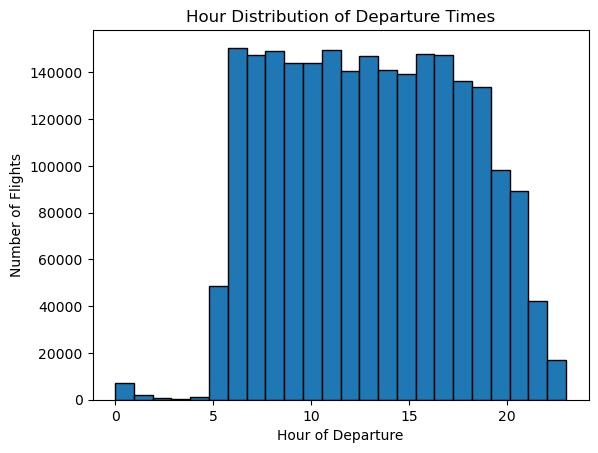

In [84]:
plt.hist(flights_df['DepTime'], edgecolor='black', bins=24)
plt.xlabel('Hour of Departure')
plt.ylabel('Number of Flights')
plt.title('Hour Distribution of Departure Times')
plt.show()


In [ ]:
# 16. Show how the number of flights changes through time 
# (on the daily/weekly/monthly basis) and interpret the findings.


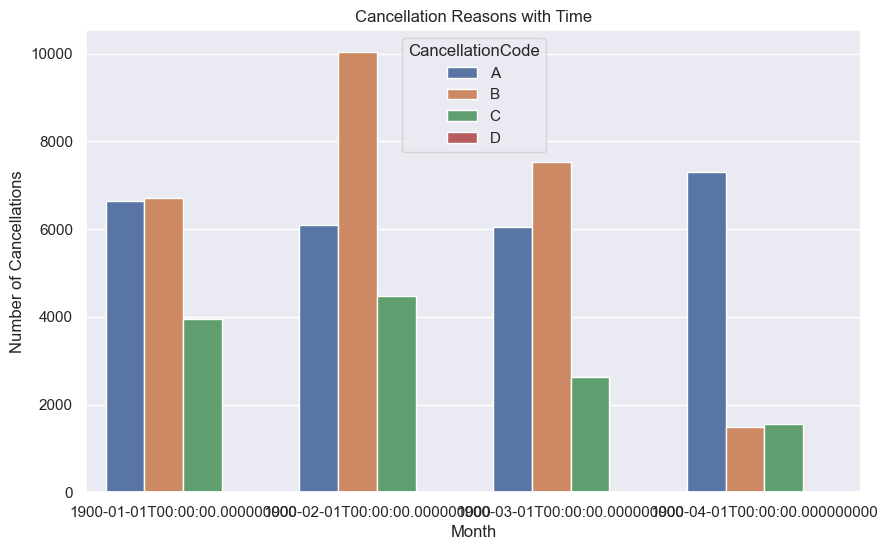

In [8]:
# 17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

# Choose all correct statements:

# October has the lowest number of cancellations due to weather.
# The highest number of cancellations in September is due to Security reasons.
# April's top cancellation reason is carriers.
# Flights cancellations due to National Air System are more frequent than those due to carriers.
flights_df['Month'] = pd.to_datetime(flights_df['Month'], format='%m')

#Grouping by month and cancellation reason and count the number of flights in each group
cancellation_counts = flights_df.groupby(['Month', 'CancellationCode']).size().reset_index(name='CancellationReasonCount')

#plotting with a stacked bar chart
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='Month', y='CancellationReasonCount', hue='CancellationCode', data=cancellation_counts)
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Cancellation Reasons with Time')
plt.show()


In [112]:
flights_df['CancellationCode'].value_counts()

Series([], Name: CancellationCode, dtype: int64)

In [9]:
# 18. Which month has the greatest number of cancellations due to Carrier?

# Don't know why code didnt work

# flights_df['Month'] = pd.to_datetime(flights_df['Month'], format='%m')
# filtering data to only include cancellations due to carrier
# carrier_cancellations= flights_df[flights_df['CancellationCode']=='UniqueCarrier']

# group data by month and count max cancellations due to carrier
# carrier_cancellation_counts = carrier_cancellations.groupby('Month').size().reset_index(name='CancellationCount')

# finding the max month due to carrier
# max_month = carrier_cancellation_counts.loc[carrier_cancellation_counts['CancellationCount'].idxmax()]['Month']
# max_month

In [10]:
# 19. Identify the carrier with the greatest number of cancellations due
# to carrier in the corresponding month from the previous question.

# Filter the dataset to include only cancellations due to carrier
cancelled_flights = flights_df[(flights_df['CancellationCode']=='A') & (flights_df['Cancelled']==1)]

# Group the dataset by the carrier and count the number of cancellations
cancellations_by_carrier = cancelled_flights.groupby(['UniqueCarrier'])['Cancelled'].count()

# Find the carrier with the greatest number of cancellations
carrier_with_most_cancellations = cancellations_by_carrier.idxmax()

carrier_with_most_cancellations

'AA'

In [11]:
# Question 20

# Filter the dataset to include only the flights with non-negative delay time.
filtered_data=flights_df[(flights_df['ArrDelay']>=0) & (flights_df['DepDelay']>=0)] 

# Group the dataset by carrier and calculate the median arrival delay and median departure delay for each carrier.
median_delays= filtered_data.groupby('UniqueCarrier')[['ArrDelay', 'DepDelay']].median()

carrier_with_lowest_median_delay = median_delays.mean(axis=1).idxmin()
carrier_with_lowest_median_delay

'AQ'

In [12]:
import os
os.getcwd()

'C:\\Users\\MIC\\OneDrive - UGent\\Desktop\\Data Engineering\\Altschool\\Ope_classes\\Python Class -20230308T154637Z-001\\Python Class\\Python Capstone 1\\Project 2 (Assignment)'